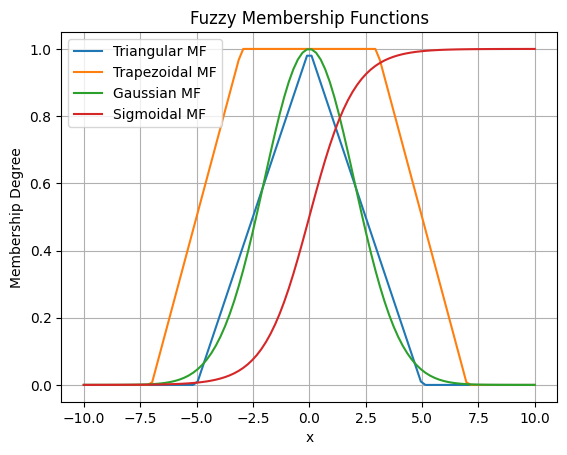

Union (A OR B): [0.5 0.6 0.8 1. ]
Intersection (A AND B): [0.2 0.4 0.7 0.9]
Complement (NOT A): [0.8 0.4 0.2 0. ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Triangular Membership Function
def triangular_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

# Define Trapezoidal Membership Function
def trapezoidal_mf(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x - a) / (b - a), 1), (d - x) / (d - c)), 0)

# Define Gaussian Membership Function
def gaussian_mf(x, c, sigma):
    return np.exp(-((x - c)**2) / (2 * sigma**2))

# Define Sigmoidal Membership Function
def sigmoid_mf(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

# Plot the membership functions
x = np.linspace(-10, 10, 100)

# Plot Triangular MF
plt.plot(x, triangular_mf(x, -5, 0, 5), label='Triangular MF')

# Plot Trapezoidal MF
plt.plot(x, trapezoidal_mf(x, -7, -3, 3, 7), label='Trapezoidal MF')

# Plot Gaussian MF
plt.plot(x, gaussian_mf(x, 0, 2), label='Gaussian MF')

# Plot Sigmoidal MF
plt.plot(x, sigmoid_mf(x, 1, 0), label='Sigmoidal MF')

plt.title('Fuzzy Membership Functions')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

# Fuzzy Set Operations
A = np.array([0.2, 0.6, 0.8, 1.0])
B = np.array([0.5, 0.4, 0.7, 0.9])

# Union (max)
union = np.maximum(A, B)
print(f'Union (A OR B): {union}')

# Intersection (min)
intersection = np.minimum(A, B)
print(f'Intersection (A AND B): {intersection}')

# Complement
complement_A = 1 - A
print(f'Complement (NOT A): {complement_A}')
